<a href="https://colab.research.google.com/github/Taryn-Cail/Python-Group-Project-2704/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2704 Group Project

## Jackson McIntyre, Nicolas Serrano and Taryn Cail

This project analyzes the relationship between students GPA and study hours per day.

## Importing necessary libraries.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Loading the data into a dataframe.

In [26]:
#Load the data set with only the required columns
df = pd.read_csv('data.csv') #Reading the file into the df
df = df[['Student_ID', 'Study_Hours_Per_Day', 'GPA', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']]
print(df) # Printing the entire dataset

      Student_ID  Study_Hours_Per_Day   GPA  Extracurricular_Hours_Per_Day  \
0              1                  6.9  2.99                            3.8   
1              2                  5.3  2.75                            3.5   
2              3                  5.1  2.67                            3.9   
3              4                  6.5  2.88                            2.1   
4              5                  8.1  3.51                            0.6   
...          ...                  ...   ...                            ...   
1995        1996                  6.5  3.32                            0.2   
1996        1997                  6.3  2.65                            2.8   
1997        1998                  6.2  3.14                            0.0   
1998        1999                  8.1  3.04                            0.7   
1999        2000                  9.0  3.58                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0           

## Grouping the various GPA numbers into new sections called Low, Med and High

In [27]:
#Grouping GPA into various levels
def categorize_gpa(gpa):
  if gpa <= 2.85:
    return 'Low'
  elif gpa > 2.85 and gpa <= 3.35:
    return 'Med'
  elif gpa > 3.35:
    return 'High'

#Create new column for GPA groups with the new groups in it (Low, Med, High)
df['GPA Level'] = df['GPA'].apply(categorize_gpa)
print(df)

      Student_ID  Study_Hours_Per_Day   GPA  Extracurricular_Hours_Per_Day  \
0              1                  6.9  2.99                            3.8   
1              2                  5.3  2.75                            3.5   
2              3                  5.1  2.67                            3.9   
3              4                  6.5  2.88                            2.1   
4              5                  8.1  3.51                            0.6   
...          ...                  ...   ...                            ...   
1995        1996                  6.5  3.32                            0.2   
1996        1997                  6.3  2.65                            2.8   
1997        1998                  6.2  3.14                            0.0   
1998        1999                  8.1  3.04                            0.7   
1999        2000                  9.0  3.58                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0           

## Calculate mean Study Hours per day for the various GPA groups

In [28]:
# Declaring the order
gpa_order = ['Low', 'Med', 'High']

# groupby() groups by col and resetindex() converts back into data
gpa_by_studyH = df.groupby('GPA Level')['Study_Hours_Per_Day'].mean().reset_index()

# Placing the categories visually in the correct order (ie. Low, Med, High)
gpa_by_studyH['GPA Level'] = pd.Categorical(gpa_by_studyH['GPA Level'], categories=gpa_order,ordered=True)

# Sorting the values
gpa_by_studyH = gpa_by_studyH.sort_values('GPA Level')

# Printing the new table
print(gpa_by_studyH)

  GPA Level  Study_Hours_Per_Day
1       Low             6.041422
2       Med             7.414488
0      High             8.898913


## Creating a Bar Graph

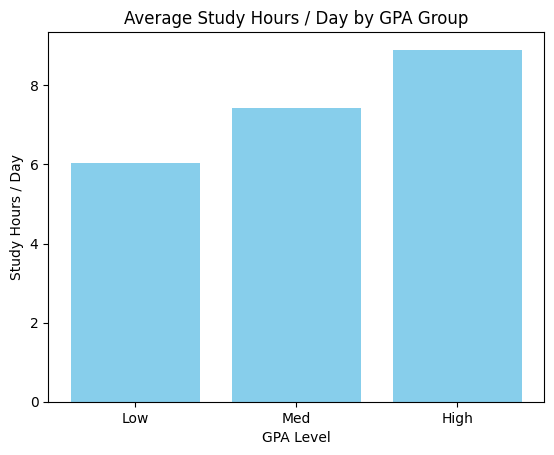

In [29]:
#Visualize - bar graph
plt.clf()
plt.bar(gpa_by_studyH['GPA Level'], gpa_by_studyH['Study_Hours_Per_Day'], color='skyblue')
plt.xlabel("GPA Level")
plt.ylabel("Study Hours / Day")
plt.title("Average Study Hours / Day by GPA Group")
plt.savefig("bar_graph.svg", format="svg", bbox_inches="tight")
plt.show()

## Creating a Scatter Plot

[]

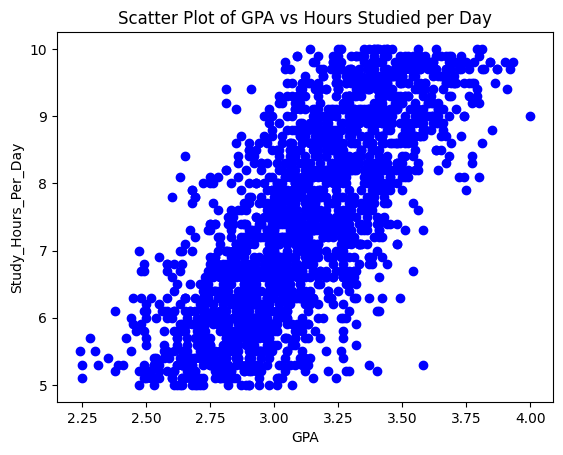

In [30]:
#Visualize - scatter plot
plt.clf()
plt.scatter(df['GPA'], df['Study_Hours_Per_Day'], color='blue', marker='o')
plt.xlabel('GPA')
plt.ylabel('Study_Hours_Per_Day')
plt.title('Scatter Plot of GPA vs Hours Studied per Day')
plt.savefig("scatter_plot.svg", format="svg", bbox_inches="tight")
plt.plot()

## Creating a Heatmap

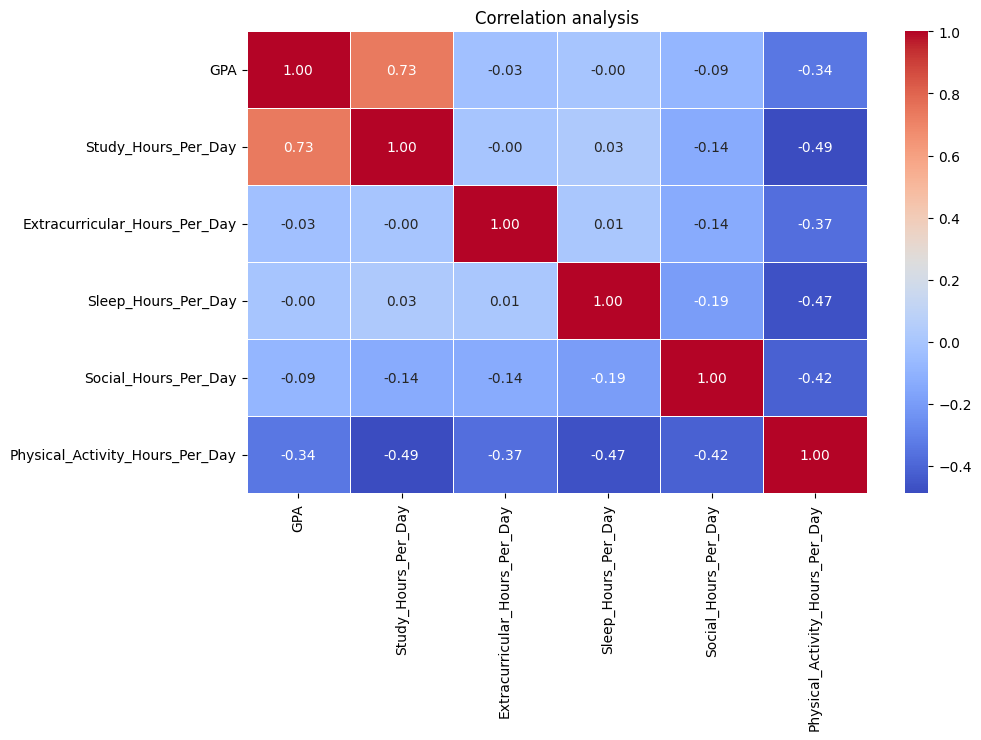

In [31]:
#Visualize - heatmap
correltaion_data = df[['GPA','Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']]
corr_matrix = correltaion_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation analysis")
plt.savefig("heatmap.svg", format="svg", bbox_inches="tight")
plt.show()


## Calculating the P-Value and Pearson Correlation Coefficient

In [32]:
x = stats.pearsonr(df['Study_Hours_Per_Day'], df['GPA'])
print(x)

PearsonRResult(statistic=np.float64(0.7344679806560517), pvalue=np.float64(0.0))


In [33]:
# Perform Pearson correlation test
r, p_value = stats.pearsonr(df['Study_Hours_Per_Day'], df['GPA'])

# Print Results
print(f"Pearson correlation coefficient: {r:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: 0.7345
P-value: 0.0000


A positive r value indicates a positive relationship between study hours per day and GPA. When r exceeds 0.7, it signifies a strong positive linear correlation.

Additionally, a p-value belo 0.05 confirms statistical significance.

Based on our results, we can reject the null hypothesis and conclude that increased study hours are associated with higher GPA.

## Creating a Simple Linear Regression Model

Mean Squared Error (MSE): 0.04
R² Score: 0.55
Coefficient (slope): 0.153
Intercept: 1.969


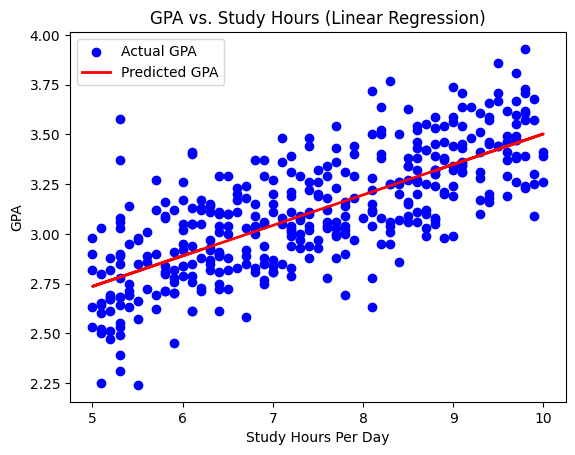

ValueError: continuous is not supported

In [34]:
#Predictive Model: Simple Linear Regression

#Prepare Data
X = df[['Study_Hours_Per_Day']]
y = df['GPA']

#Split data into Training/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model
model = LinearRegression()
model.fit(X_train, y_train)

#Evaluate the model
#Predict on test data
y_pred = model.predict(X_test)

#Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")  # Closer to 1 is better

#Interpret results
print(f"Coefficient (slope): {model.coef_[0]:.3f}") # Example output: Coefficient: 0.145 means each additional study hour increases GPA by 0.145 points (on average).
print(f"Intercept: {model.intercept_:.3f}") # This is the predicted GPA when study hours = 0.

#Visualize Predictions
plt.scatter(X_test, y_test, color='blue', label='Actual GPA')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted GPA')
plt.xlabel('Study Hours Per Day')
plt.ylabel('GPA')
plt.title('GPA vs. Study Hours (Linear Regression)')
plt.legend()
plt.savefig("linear_regression.svg", format="svg", bbox_inches="tight")

# Print the figure
plt.show()

# Testing Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## Testing the Simple Linear Regression Model with our own values

In [35]:
# Now using our predictive model to make predictions for new values

study_hours = [[10]]
predicted_gpa = model.predict(study_hours)
print(f"Predicted GPA for {study_hours} hours/day: {predicted_gpa[0]:.2f}\n\n")

Predicted GPA for [[10]] hours/day: 3.50




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Making a Linear Discriminate Analysis Model

In [36]:
#Making Linear Discriminate Analysis as a predictive model

# Select only study hours as the predictor
X = df[['Study_Hours_Per_Day']]
y = df['GPA Level']  # Categorical target (Low/Med/High)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.67

Classification Report:
               precision    recall  f1-score   support

        High       0.66      0.59      0.62        94
         Low       0.65      0.51      0.57        88
         Med       0.68      0.77      0.72       218

    accuracy                           0.67       400
   macro avg       0.66      0.62      0.64       400
weighted avg       0.67      0.67      0.67       400



## Testing the Linear Discriminant Model with our own values

In [37]:
#Using my own values in predictive model

std_hrs = 0 #ex. 5.2 hrs per day
input_data = [[std_hrs]]

predicted_gpa_levels = lda.predict(input_data)[0]

probabilities = lda.predict_proba(input_data)[0]

print(f"\nFor {std_hrs} study hours/day:")
print(f"→ Predicted GPA Level: {predicted_gpa_levels}")
print(f"→ Probabilities: Low={probabilities[0]:.2f}, Med={probabilities[1]:.2f}, High={probabilities[2]:.2f}")
print()
print()


For 0 study hours/day:
→ Predicted GPA Level: Low
→ Probabilities: Low=0.00, Med=1.00, High=0.00




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


## Testing whether Study Hours is the sole affector for the GPA values

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


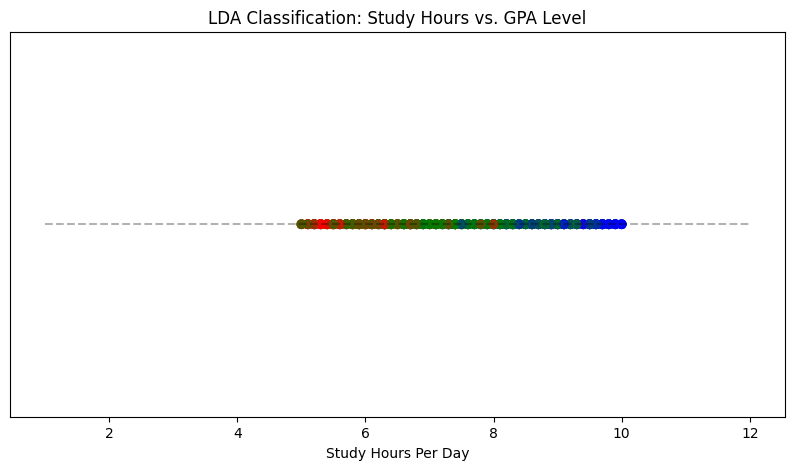

In [38]:
#Visual decision boundaries

import numpy as np
import matplotlib.pyplot as plt

# Create a range of study hours (1-12 hrs)
study_hours_range = np.linspace(1, 12, 500).reshape(-1, 1)

# Predict GPA levels for these hours
gpa_predictions = lda.predict(study_hours_range)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(X_train, [0] * len(X_train), c=y_train.map({'Low': 'red', 'Med': 'green', 'High': 'blue'}), alpha=0.3)
plt.plot(study_hours_range, [0] * len(study_hours_range), c='black', linestyle='--', alpha=0.3)
plt.yticks([])
plt.xlabel('Study Hours Per Day')
plt.title('LDA Classification: Study Hours vs. GPA Level')
plt.savefig("lda_classification.svg", format="svg", bbox_inches="tight")
plt.show()

The heavy overlap shows that study hours per day may not be the sole determinant for GPA levels.